In [1]:
from transformers import BertForSequenceClassification, BertTokenizerFast
import torch
from transformers import AdamW, get_scheduler
from torch.utils.data import DataLoader
from src.dataset import TurtleSoupClassificationDataset
from src.utils import plot_training_validation_loss, plot_training_validation_acc, save_training_results
from run import train_classification_model

c:\Users\wei\Desktop\programs\deep learning\turtle-soup-lateral-thinking-game\model\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [3]:
model = BertForSequenceClassification.from_pretrained("nycu-ai113-dl-final-project/bert-contrastive-pretrained-zh", num_labels=3)
tokenizer = BertTokenizerFast.from_pretrained("nycu-ai113-dl-final-project/bert-contrastive-pretrained-zh")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
batch_size = 8
epochs = 10
learning_rate = 1e-5

template = "根據判定規則，此玩家的猜測為"
label_map = {
    "T": 0,
    "F": 1,
    "N": 2
}

In [5]:
train_data_path = "./data/TurtleBench-extended-zh/train_8k.json"
test_data_path = "./data/TurtleBench-extended-zh/test_1.5k.json"
prompt_path = "./prompts/prompt_zh.json"

In [6]:
train_dataset = TurtleSoupClassificationDataset(train_data_path, prompt_path, tokenizer, max_length=512, template=template, label_map=label_map)
test_dataset = TurtleSoupClassificationDataset(test_data_path, prompt_path, tokenizer, max_length=512, template=template, label_map=label_map)

# 創建 DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
num_training_steps = len(train_dataloader) * epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

c:\Users\wei\Desktop\programs\deep learning\turtle-soup-lateral-thinking-game\model\venv\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
train_losses, train_accuracies, val_losses, val_accuracies = train_classification_model(
    model, train_dataloader, val_dataloader, optimizer, lr_scheduler, epochs, device=device
)

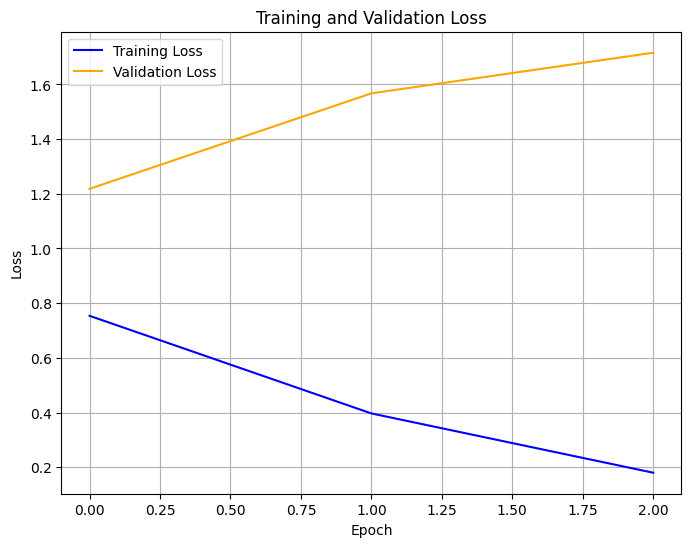

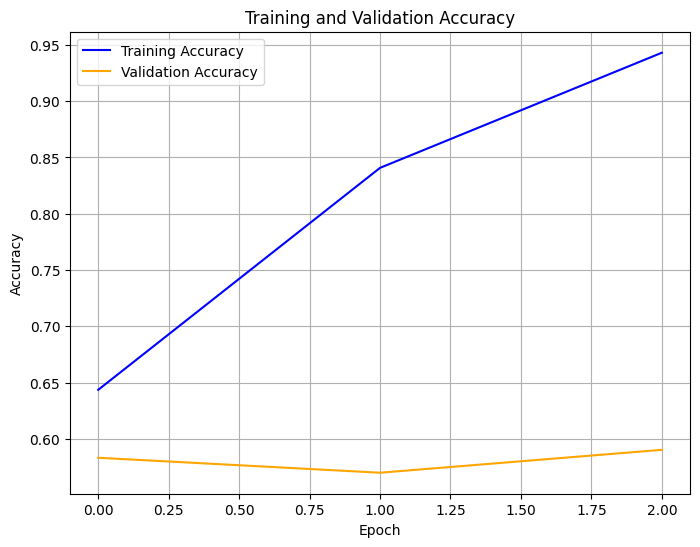

In [9]:
plot_training_validation_loss(train_losses, val_losses)
plot_training_validation_acc(train_accuracies, val_accuracies)